# Домашнє завдання з теми «Підхід Ньютона і Лагранжа»

In [1]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))

4. На невагомій нерозтяжній нитці довжиною l підвішено маленький вантаж масою m,
а до нього на ще одній нитці довжиною 2l ще один вантаж, масою 2m. Напишіть
рівняння Ньютона, що описують рух системи у одній вертикальній площині. Спростіть
їх, вважаючи кути відхилення малими і розв’яжіть їх.

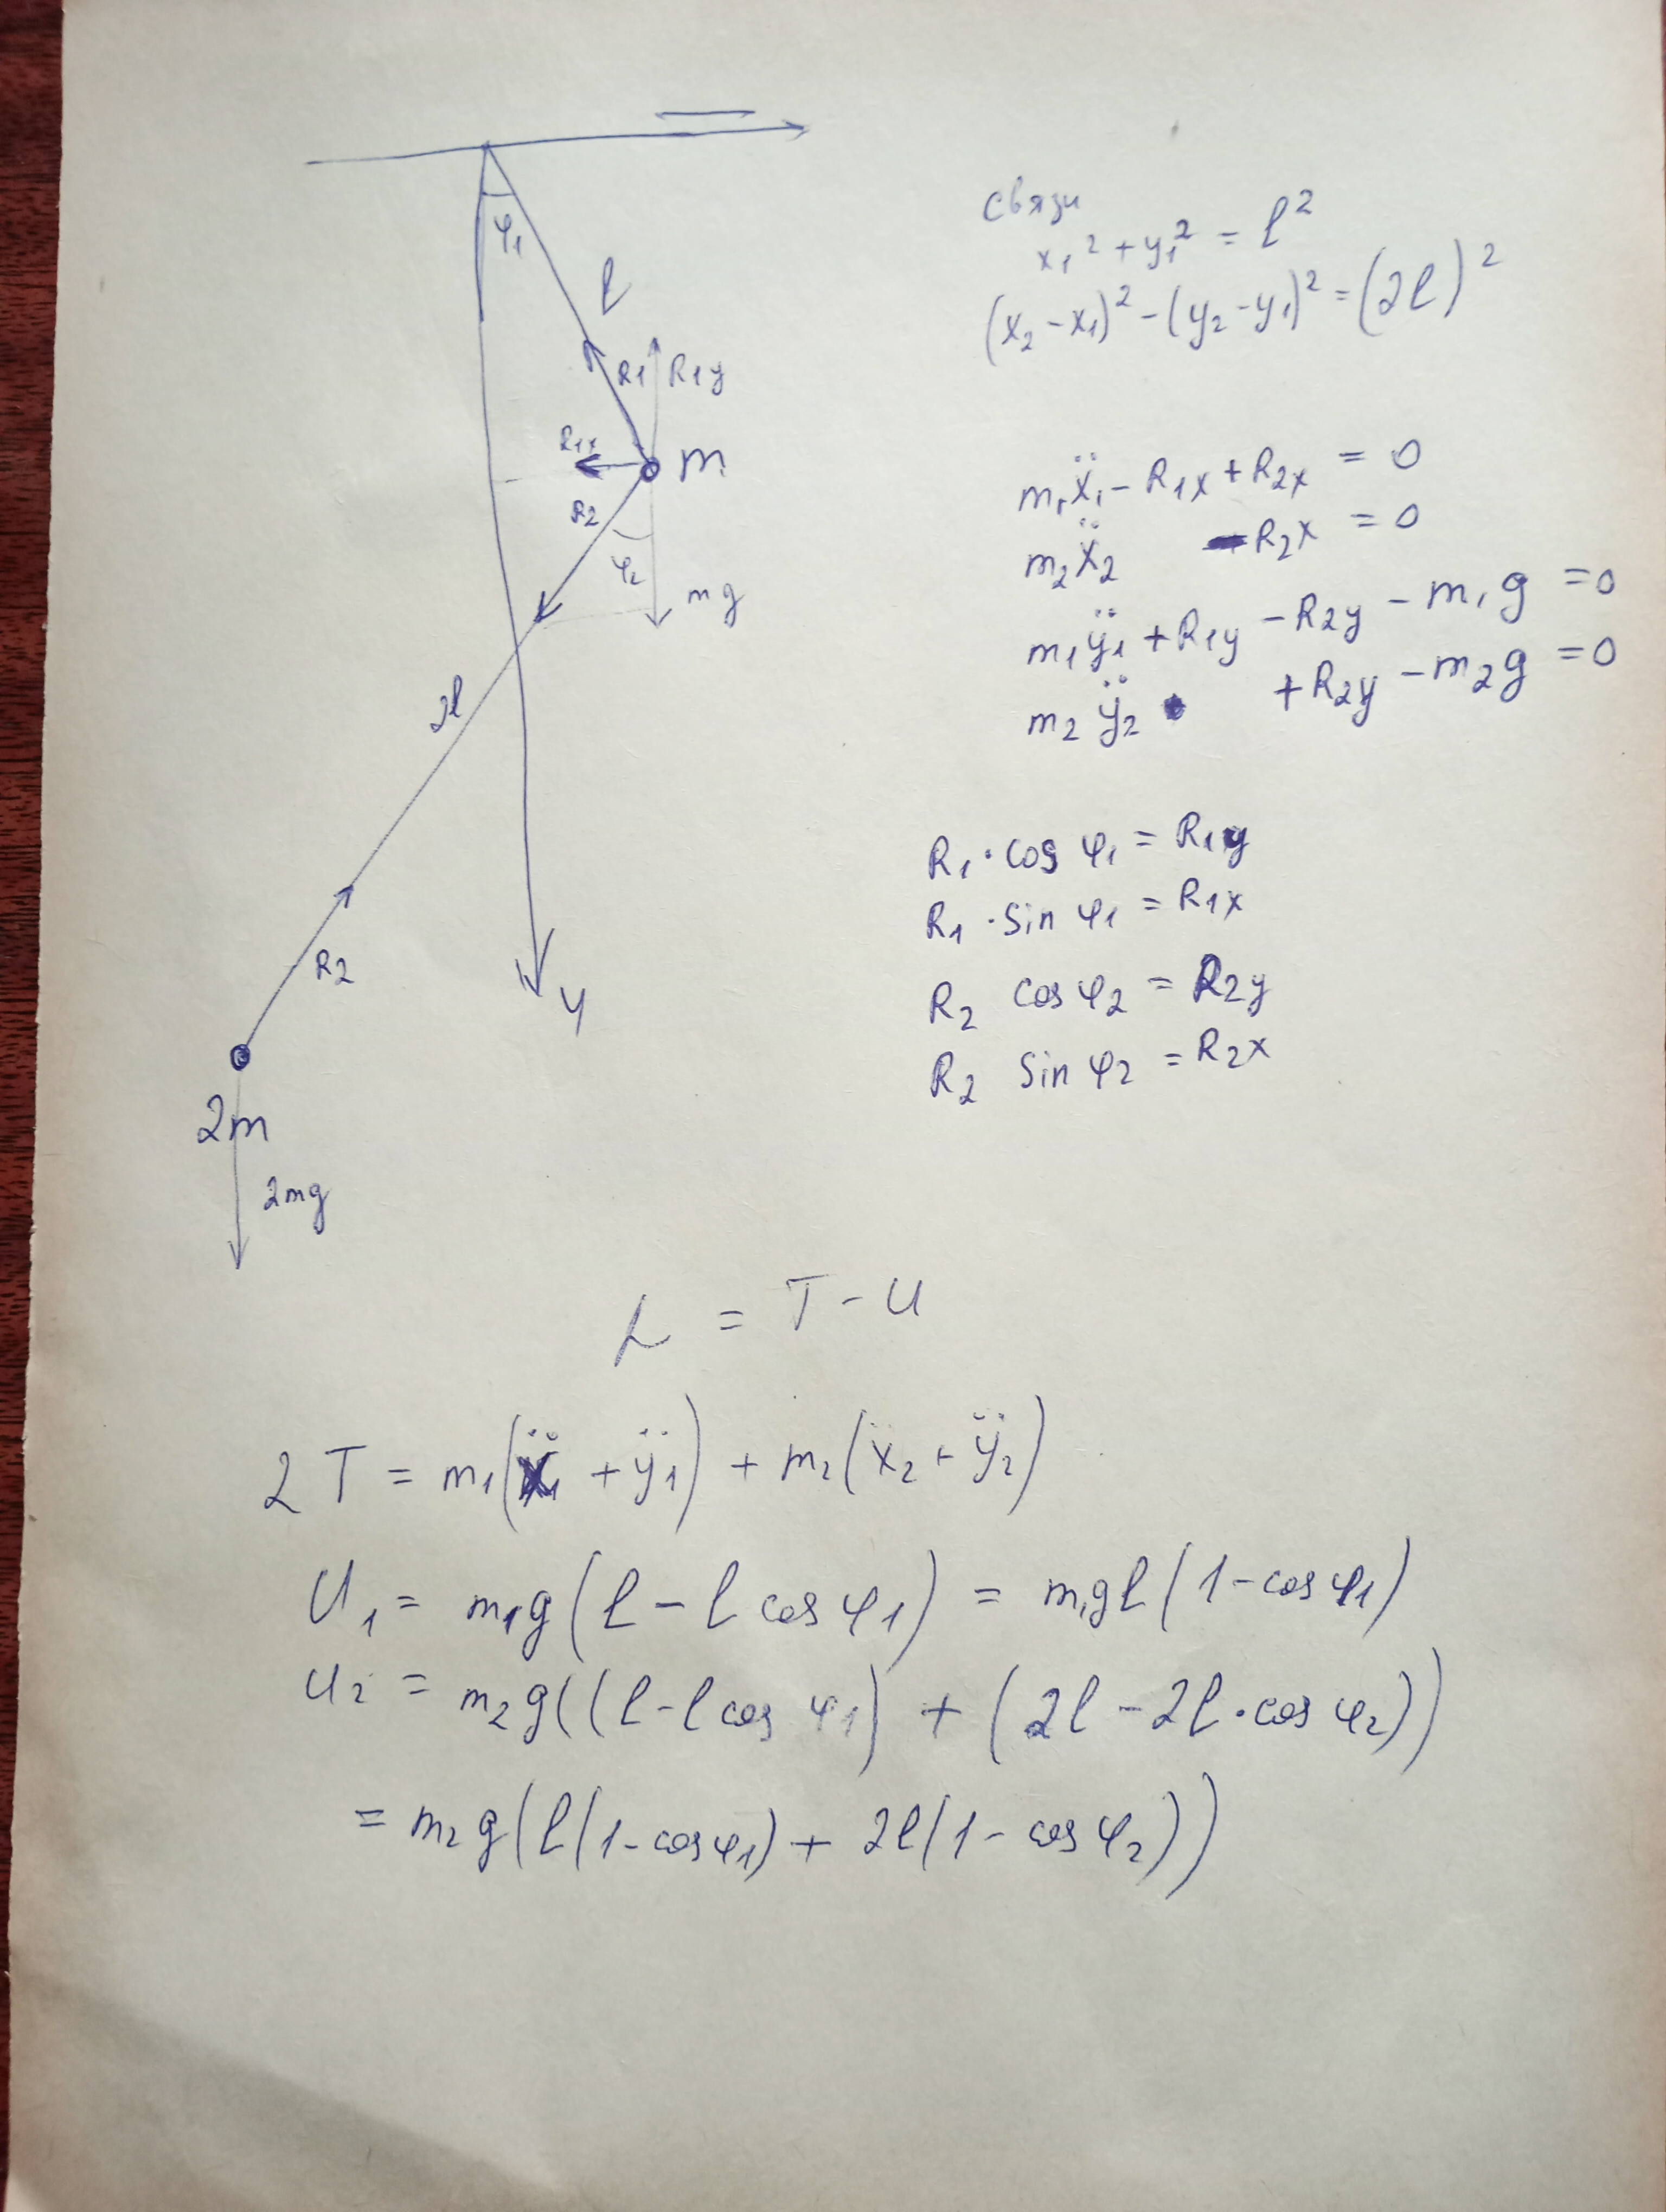

In [2]:
# Объявление переменных и функций зависящих от времени

# Длины нитей, массы, ускорение свободного падения и время
l1, l2, m1, m2, g, t = var("l1, l2, m_1, m_2, g, t")

# обобщённые координаты phi_1, phi_2
phi_1 = function("phi_1")(t)
phi_2 = function("phi_2")(t)

# декартовы координаты шариков
x1 = function("x_1")(t)
y1 = function("y_1")(t)
x2 = function("x_2")(t)
y2 = function("y_2")(t)

# Силы реакции, модули и проекции в декартовых координатах
R1, R2, R1x, R1y, R2x, R2y = var("R_1, R_2, R1x, R1y, R2x, R2y")

In [3]:
# Координаты грузов, - уравнения перехода из декартовых координат в обобщённые координаты phi_1, phi_2

eqs_xy = [
    x1 == l1*sin(phi_1),
    x2 == l1*sin(phi_1) + l2 * sin(phi_2),
    y1 == l1*cos(phi_1),
    y2 == l1*cos(phi_1) + l2 * cos(phi_2),
]
disp(eqs_xy)

<IPython.core.display.Math object>

In [4]:
# Силы реакции, уравнения перехода из декартовых координат в обобщённые координаты phi_1, phi_2

R_eqs = [
    R1x == R1 * sin(phi_1),
    R1y == R1 * cos(phi_1),
    R2x == R2 * sin(phi_2),
    R2y == R2 * cos(phi_2),
]
disp(R_eqs)

<IPython.core.display.Math object>

In [5]:
# Уравнения второго закона Ньютона в декартовых координатах

Newton_eqs = [
    m1 * x1.diff(t,2) - R1x + R2x == 0,
    m2 * x2.diff(t,2)       - R2x == 0,
    m1 * y1.diff(t,2) + R1y - R2y - m1 * g == 0,
    m2 * y2.diff(t,2)       + R2y - m2 * g == 0,
]
disp(Newton_eqs[0])
disp(Newton_eqs[1])
disp(Newton_eqs[2])
disp(Newton_eqs[3])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
# Переводим уравнения второго закона Ньютона из декартовых координат в обобщенные постредством подстановки 

Newton_eqs2 = [Newton_eq.subs(R_eqs).substitute_function(eqs_xy) for Newton_eq in Newton_eqs]
disp(Newton_eqs2[0])
disp(Newton_eqs2[1])
disp(Newton_eqs2[2])
disp(Newton_eqs2[3])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
# Складывая попарно уравнения по x и по y исключаем силу реакции R_2

disp(Newton_eqs2[0]+Newton_eqs2[1])
disp(Newton_eqs2[2]+Newton_eqs2[3])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
# делим полученные два уравнения на синус и косинус первой обобщенной координаты, чтобы отделить силу реакции R_1

disp(((Newton_eqs2[0]+Newton_eqs2[1])/sin(phi_1)).expand())
disp(((Newton_eqs2[2]+Newton_eqs2[3])/cos(phi_1)).expand())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
# Складывая полученные уравнения сокращаем силу реакции
# и получаем результирующее дифференциальное уравнение второго порядка

de = ((Newton_eqs2[0]+Newton_eqs2[1])/sin(phi_1)).expand() + \
     ((Newton_eqs2[2]+Newton_eqs2[3])/cos(phi_1)).expand()
disp(de)

<IPython.core.display.Math object>

In [10]:
# Пытаемся упростить полученное уравнение

de = (de * sin(phi_1) * cos(phi_1)).expand()
disp(de)

<IPython.core.display.Math object>

In [11]:
# и в конце концов делаем подстановку масс и длин

m, l = var("m, l")
de_ = de.subs([m1 == m, m2 == 2 * m, l1 == l, l2 == 2*l])
de_ = de_.full_simplify()#.expand()
disp(de_)

<IPython.core.display.Math object>

# 5. Розв’яжіть задачу 4 методом Лагранжа.

In [12]:
# Кинетическая энергия в декартовых координатах

T = (1/2) * ( \
             m1*((x1.diff(t))^2 + (y1.diff(t))^2) +
             m2*((x2.diff(t))^2 + (y2.diff(t))^2) )
disp(T)

<IPython.core.display.Math object>

In [13]:
# Кинетическая энергия в обобщённых координатах phi_1, phi_2

T = T.substitute_function(eqs_xy)
T = T.full_simplify()
disp(T)

<IPython.core.display.Math object>

In [14]:
# Потенциальная энергия в обобщённых координатах phi_1, phi_2

U = m1 * g * l1 * (1-cos(phi_1)) \
  + m2 * g * l1 * (1-cos(phi_1)) + m2 * g * l2 * (1-cos(phi_2))
U = U.full_simplify()
disp(U)

<IPython.core.display.Math object>

Лагранжиан

In [15]:
L = T - U
disp(L)

<IPython.core.display.Math object>

При записи уравнений Эйлера-Лагранжа

$\frac{d}{dt}\frac{\partial L}{\partial \dot{\varphi_1}} - \frac{\partial L}{\partial {\varphi_1}} = 0$

$\frac{d}{dt}\frac{\partial L}{\partial \dot{\varphi_2}} - \frac{\partial L}{\partial {\varphi_2}} = 0$

введём переменные

$\omega_1 = \dot{\varphi_1}$

$\omega_2 = \dot{\varphi_2}$

In [16]:
# Объявление переменных и функций

omega1 = var("omega_1")
omega2 = var("omega_2")

omega_1 = function("omega_1")(t)
omega_2 = function("omega_2")(t)

phi1, phi2 = var("phi1, phi2")

In [17]:
# уравнения замены производных обобщенных координат на omega

subs_to_omega      = [phi_1.diff(t) == omega1,  phi_2.diff(t) == omega2]
subs_to_omega_func = [phi_1.diff(t) == omega_1, phi_2.diff(t) == omega_2]

In [18]:
# в Лагранжиане производим замену производных обобщенных координат на omega

L = L.subs(subs_to_omega)
disp(L)

<IPython.core.display.Math object>

Найдем обобщенные импульсы

$P_{12} = \frac{\partial L}{\partial \dot{\phi_{12}}} = \frac{\partial L}{\partial {\omega_{12}}}$

In [19]:
P1 = L.diff(omega1).subs(omega1 == omega_1, omega2 == omega_2)
P2 = L.diff(omega2).subs(omega1 == omega_1, omega2 == omega_2)

In [20]:
disp(P1)
disp(P2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Найдем обобщенные силы

$\frac{\partial L}{\partial {\phi_{12}}} = F_{12}$

In [21]:
F1 = L.subs(phi_1 == phi1).diff(phi1).subs(phi1 == phi_1).subs(subs_to_omega_func)
F2 = L.subs(phi_2 == phi2).diff(phi2).subs(phi2 == phi_2).subs(subs_to_omega_func)

In [22]:
disp(F1)
disp(F2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Запишем уравнения Эйлера-Лагранжа

$\frac{d}{dt}\frac{\partial L}{\partial \dot{\varphi_1}} - \frac{\partial L}{\partial {\varphi_1}} = 0$

In [23]:
de1 = P1.diff(t) - F1 == 0
de2 = P2.diff(t) - F2 == 0

In [24]:
disp(de1.full_simplify())

<IPython.core.display.Math object>

In [25]:
disp(de2.full_simplify())

<IPython.core.display.Math object>

In [26]:
# в уравнениях Эйлера-Лагранжа производим замену производных обобщенных координат на omega

de1 = de1.subs(subs_to_omega_func).full_simplify().expand()
de2 = de2.subs(subs_to_omega_func).full_simplify().expand()

In [27]:
disp(de1)

<IPython.core.display.Math object>

In [28]:
disp(de2)

<IPython.core.display.Math object>

In [29]:
# делаем подстановку масс и длин

de_1 = de1.subs([m1 == m, m2 == 2 * m, l1 == l, l2 == 2*l])
de_2 = de2.subs([m1 == m, m2 == 2 * m, l1 == l, l2 == 2*l])
de_1 = de_1.full_simplify().expand()
de_2 = de_2.full_simplify().expand()

In [30]:
disp(de_1)

<IPython.core.display.Math object>

In [31]:
disp(de_2)

<IPython.core.display.Math object>

In [32]:
# Пытаемся интегрировать

sol = desolve_system([de_1, de_2], [phi_1, phi_2, omega_1, omega_2], ivar = t)
disp(sol[0])
disp(sol[1])
disp(sol[2])
disp(sol[3])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Сравнение с решением задачи 4

In [33]:
disp(de_.expand())

<IPython.core.display.Math object>

In [34]:
# Полученное решение не особо удобно для инегрирования, поэтому

# 5'. Решение задачи 4 методом Гамильтона.

Выразим энергию через Лагранжиан

$E = \Sigma_{i}^{} \frac {\partial L}{\partial \dot{q}_i} \frac {q_i}{dt} - L$

In [35]:
E = P1 * omega_1 + P2 * omega_2 - L

In [36]:
disp (E)

<IPython.core.display.Math object>

In [37]:
# Объявление переменных - обобщенные импульсы

p_1, p_2 = var ("p_1, p_2")

In [38]:
# Записываем уравнения выражающие обобщенные импульсы
# через производные Лагранжиана по скорости изменения обобщенной координаты (по omega)

eq_p_omega = [p_1 == L.diff(omega1), p_2 == L.diff(omega2)]
disp(eq_p_omega[0])
disp(eq_p_omega[1])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [39]:
# Ищем выражение для omega через обобщенные импульсы, решая вышесозданную систему уравнений

sol_omega_p = solve(eq_p_omega, [omega1, omega2])
disp(sol_omega_p)

<IPython.core.display.Math object>

In [40]:
# Находим выражение для Гамильтониана исходя из
# выражения энергии через Лагранжиан
# используя вышенайденную подстановку, выражающую omega через обобщенные импульсы и координаты

H = (p_1 * omega1 + p_2 * omega2 - L).subs(sol_omega_p).subs(phi_1 == phi1, phi_2 == phi2).full_simplify()

In [41]:
disp(H)

<IPython.core.display.Math object>

In [42]:
# в Гамильтониане делаем подстановку масс и длин

H = H.subs([m1 == m, m2 == 2 * m, l1 == l, l2 == 2*l]).full_simplify()
disp(H)

<IPython.core.display.Math object>

Записываем уравнения Гамильтона

$\dot{p}_i = - \frac{\partial H}{\partial q_i}$

$\dot{q}_i = \frac{\partial H}{\partial p_i}$

In [43]:
dot_p1 = - H.diff(phi1)
dot_p2 = - H.diff(phi2)

In [44]:
dot_phi1 = H.diff(p_1)
dot_phi2 = H.diff(p_2)

In [45]:
disp(dot_p1)

<IPython.core.display.Math object>

In [46]:
disp(dot_p2)

<IPython.core.display.Math object>

In [47]:
disp(dot_phi1)

<IPython.core.display.Math object>

In [48]:
disp(dot_phi2)

<IPython.core.display.Math object>

In [49]:
# полученные уравнения Гамильтона обьединяем в систему из 4 уравнений
des = [dot_p1, dot_phi1, dot_p2, dot_phi2]

# в которой делаем подстановку численных значений масс, длин и ускорения свободного падения
f = [de_i.subs(g == 10, l == 1, m == 1) for de_i in des]

In [50]:
# Solve numerically a system of first-order ordinary differential equations
# using odeint from scipy.integrate module.

# des – right hand sides of the system
# ics – initial conditions
# times – a sequence of time points in which the solution must be found
# dvars – dependent variables. ATTENTION: the order must be the same as in des, that means: d(dvars[i])/dt=des[i]
# ivar – independent variable, optional.

times = srange(0, 8, 0.01)

#sol = desolve_odeint(des=f, ics=[0,1,0,-1], times=times, dvars=[p_1, phi1, p_2, phi2], ivar=t)
#sol = desolve_odeint(des=f, ics=[0,0,0,pi/8], times=times, dvars=[p_1, phi1, p_2, phi2], ivar=t)
#sol = desolve_odeint(des=f, ics=[0,0,1,0], times=times, dvars=[p_1, phi1, p_2, phi2], ivar=t)
sol = desolve_odeint(des=f, ics=[5,0,0,0], times=times, dvars=[p_1, phi1, p_2, phi2], ivar=t)

# Построение фазовых диаграмм ($p_2(p_1)$)

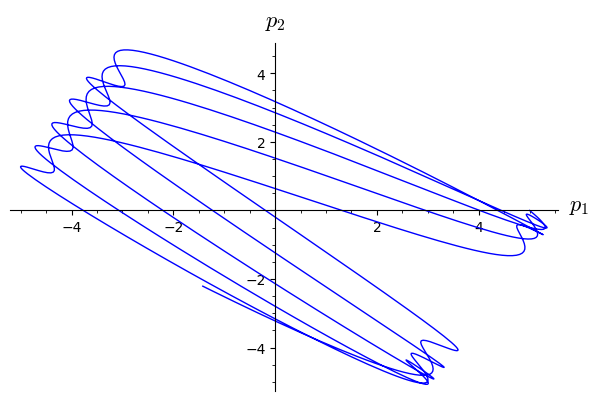

In [51]:
p = line(zip(sol[:,0],sol[:,2]), axes_labels=['$p_1$','$p_2$'])
p.show()

# Построение фазовых диаграмм ($\varphi_2(\varphi_1)$)

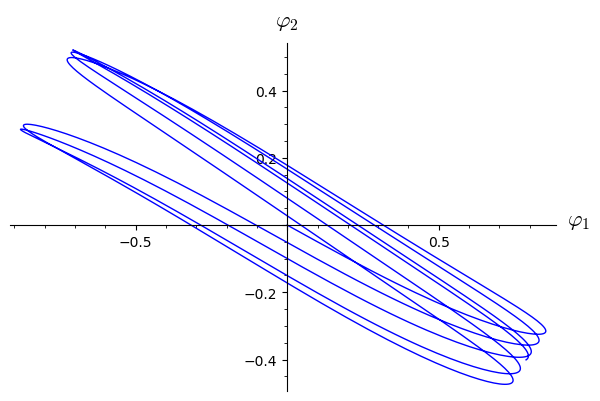

In [52]:
p = line(zip(sol[:,1],sol[:,3]), axes_labels=['$\\varphi_1$','$\\varphi_2$'])
p.show()

# Построение фазовых диаграмм ($\varphi(p)$)

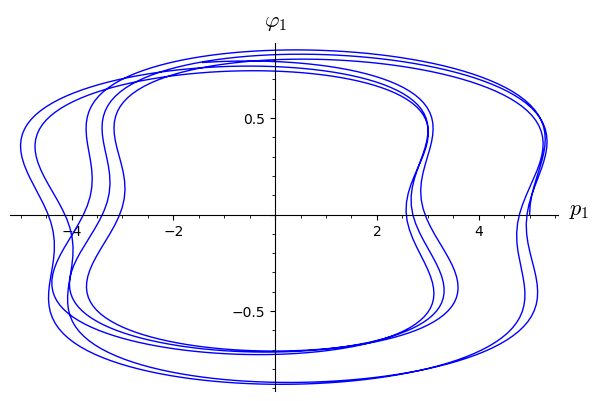

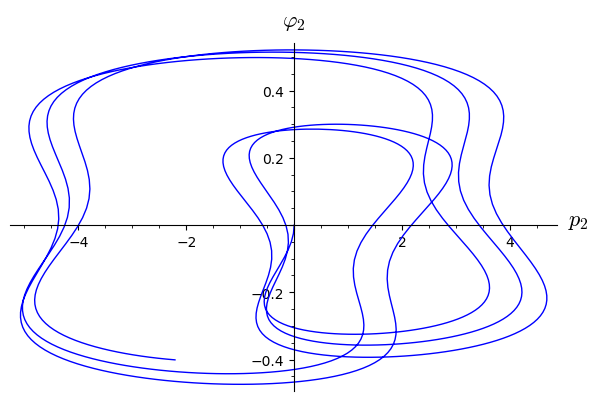

In [53]:
p = line(zip(sol[:,0],sol[:,1]), axes_labels=['$p_1$','$\\varphi_1$'])
p.show()

p = line(zip(sol[:,2],sol[:,3]), axes_labels=['$p_2$','$\\varphi_2$'])
p.show()

# Построение зависимости обобщённых координат и импульсов от времени

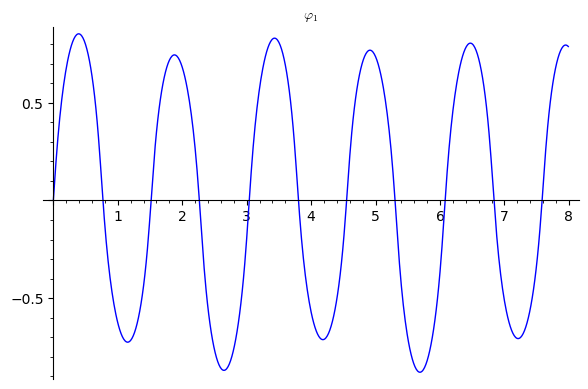

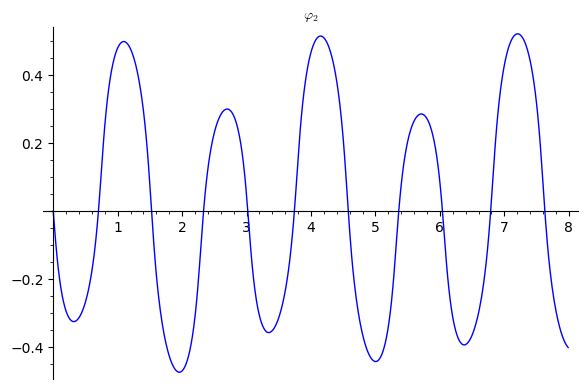

In [54]:
p = line(zip(times,sol[:,1]))
p.show(title="$\\varphi_1$")

p = line(zip(times,sol[:,3]))
p.show(title="$\\varphi_2$")

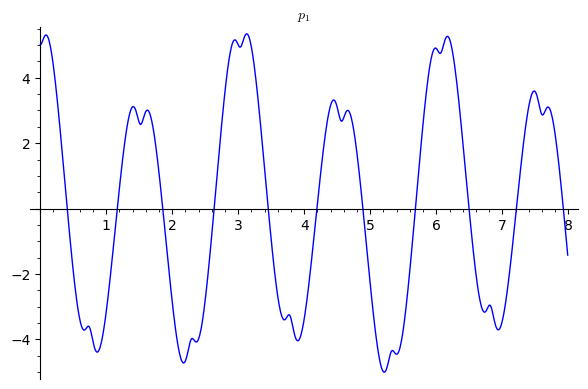

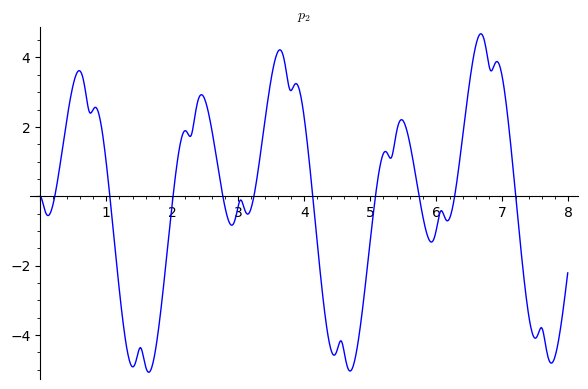

In [55]:
p = line(zip(times,sol[:,0]))
p.show(title="$p_1$")

p = line(zip(times,sol[:,2]))
p.show(title="$p_2$")

# Построение анимации

In [56]:
frames = []

l1_ = 1
l2_ = 2

x0 = 0
y0 = 0
for [p_1_, phi1_, p_2_, phi2_] in sol:
    p = Graphics()

    x1_ = l1_*sin(phi1_)
    x2_ = l1_*sin(phi1_) + l2_ * sin(phi2_)
    y1_ = -l1_*cos(phi1_)
    y2_ = -l1_*cos(phi1_) - l2_ * cos(phi2_)
    
    p += line ([(x0, y0), (x1_, y1_)], color = "green", linestyle="dashed")
    p += circle((x1_, y1_), 0.05)
    p += line ([(x1_, y1_), (x2_, y2_)], color = "green", linestyle="dashed")
    p += circle((x2_, y2_), 0.1)
    frames += [p]

In [57]:
a = animate(frames, aspect_ratio=1, xmin = -2, xmax = 2, ymin = -3, ymax = 0)

Animation with 800 frames
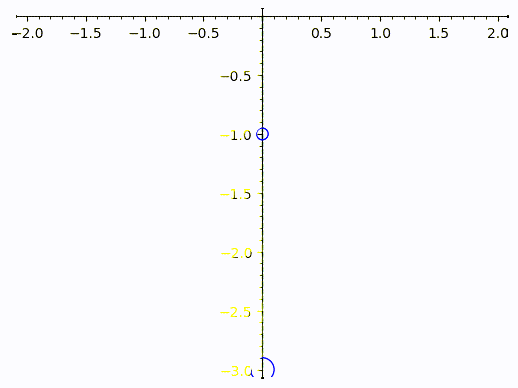

In [321]:
a.show(use_ffmpeg=True)